# Type Of Audience is Technical

Narrative: Which genre sold the most in which country ?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
video_games_df = pd.read_csv('vgsales.csv')
video_games_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
video_games_df = video_games_df.dropna()
video_games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [4]:
video_games_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16291.0,8290.190228,4792.654450,1.00,4132.50,8292.00,12439.50,16600.00
Year,16291.0,2006.405561,5.832412,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16291.0,0.265647,0.822432,0.00,0.00,0.08,0.24,41.49
EU_Sales,16291.0,0.147731,0.509303,0.00,0.00,0.02,0.11,29.02
JP_Sales,16291.0,0.078833,0.311879,0.00,0.00,0.00,0.04,10.22
Other_Sales,16291.0,0.048426,0.190083,0.00,0.00,0.01,0.04,10.57
Global_Sales,16291.0,0.540910,1.567345,0.01,0.06,0.17,0.48,82.74


n_0: The genre of games does not affect how much money it makes.

In [14]:
unique_vals = video_games_df['Genre'].unique()

In [15]:
multi_entries = []
for name in unique_vals:
    if len(video_games_df.loc[video_games_df['Genre'] == name]) > 1:
        multi_entries.append(name)
multi_entries

['Sports',
 'Platform',
 'Racing',
 'Role-Playing',
 'Puzzle',
 'Misc',
 'Shooter',
 'Simulation',
 'Action',
 'Fighting',
 'Adventure',
 'Strategy']

In [16]:
multi_platforms = video_games_df[video_games_df['Genre'].isin(multi_entries)]
multi_platforms.loc[multi_platforms['Genre'] == 'Adventure']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
50,51,Super Mario Land 2: 6 Golden Coins,GB,1992.0,Adventure,Nintendo,6.16,2.04,2.69,0.29,11.18
158,159,Assassin's Creed,X360,2007.0,Adventure,Ubisoft,3.28,1.65,0.07,0.55,5.55
218,219,Assassin's Creed,PS3,2007.0,Adventure,Ubisoft,1.91,2.00,0.09,0.83,4.83
251,252,Zelda II: The Adventure of Link,NES,1987.0,Adventure,Nintendo,2.19,0.50,1.61,0.08,4.38
400,401,Rugrats: Search For Reptar,PS,1998.0,Adventure,THQ,1.63,1.53,0.00,0.18,3.34
...,...,...,...,...,...,...,...,...,...,...,...
16572,16575,Scarlett: Nichijou no Kyoukaisen,PS2,2008.0,Adventure,Kadokawa Shoten,0.00,0.00,0.01,0.00,0.01
16575,16578,Neo Angelique Special,PSP,2008.0,Adventure,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16580,16583,Real Rode,PS2,2008.0,Adventure,Kadokawa Shoten,0.00,0.00,0.01,0.00,0.01
16586,16589,Secret Files 2: Puritas Cordis,DS,2009.0,Adventure,Deep Silver,0.00,0.01,0.00,0.00,0.01


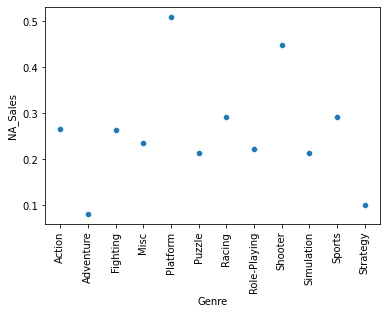

In [18]:
vals = multi_platforms.groupby('Genre').mean()
plt.xticks(rotation=90)
sns.scatterplot(x=vals.index, y='NA_Sales',data=vals)
plt.show()

Due to the data's sparsity we can see that the averge sale of each console does affect how much each platform sells. This proves the null hypothesis to be false.

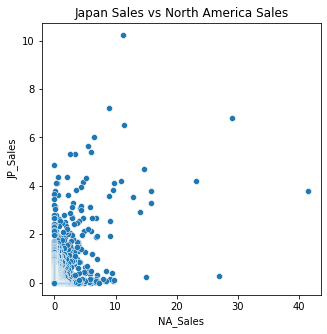

In [9]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='NA_Sales', y = 'JP_Sales',data=video_games_df)
plt.title('Japan Sales vs North America Sales')
plt.show()

In [10]:
# The Action Genre in North America appears to sell the most out of all of them
video_games_df.groupby('Genre').sum().max()

Rank            25955792.00
Year             6527703.00
NA_Sales             861.77
EU_Sales             516.48
JP_Sales             350.29
Other_Sales          184.92
Global_Sales        1722.84
dtype: float64

In [11]:
# Now I will explore the trends in the north america action genre.
NA_sales = video_games_df[['Year', 'Platform', 'NA_Sales']].loc[video_games_df['Genre'] == 'Action']
NA_sales.head()

,Year,Platform,NA_Sales
16,2013.0,PS3,7.01
17,2004.0,PS2,9.43
23,2013.0,X360,9.63
24,2002.0,PS2,8.41
38,2001.0,PS2,6.99


The playstation consoles appear to have the most sales, with the PS3 having the most

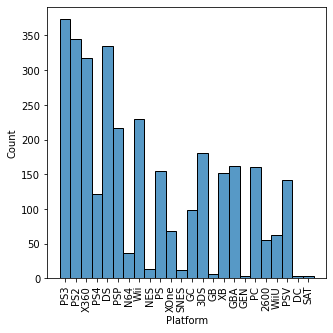

In [12]:
plt.figure(figsize=(5,5))
sns.histplot(x='Platform', data=NA_sales)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Year', ylabel='NA_Sales'>

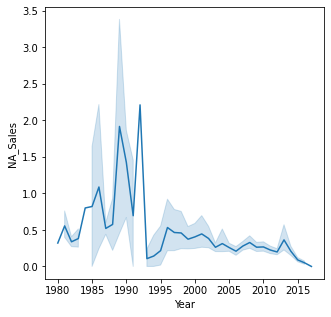

In [13]:
plt.figure(figsize=(5,5))
sns.lineplot(x='Year', y='NA_Sales', data=NA_sales)

Although Playstation has the most sales it has been declining since the 1990s